In [ ]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/HeartAttack/heart.csv')

# Mostrar las primeras filas del dataset
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Descripción general del conjunto de datos
data_description = data.describe()

data_description


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
for column in data.columns:
    print(f"Número de valores únicos para '{column}': {data[column].nunique()}")

Número de valores únicos para 'age': 41
Número de valores únicos para 'sex': 2
Número de valores únicos para 'cp': 4
Número de valores únicos para 'trtbps': 49
Número de valores únicos para 'chol': 152
Número de valores únicos para 'fbs': 2
Número de valores únicos para 'restecg': 3
Número de valores únicos para 'thalachh': 91
Número de valores únicos para 'exng': 2
Número de valores únicos para 'oldpeak': 40
Número de valores únicos para 'slp': 3
Número de valores únicos para 'caa': 5
Número de valores únicos para 'thall': 4
Número de valores únicos para 'output': 2


In [ ]:
# Verificar valores faltantes en el conjunto de datos
data.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

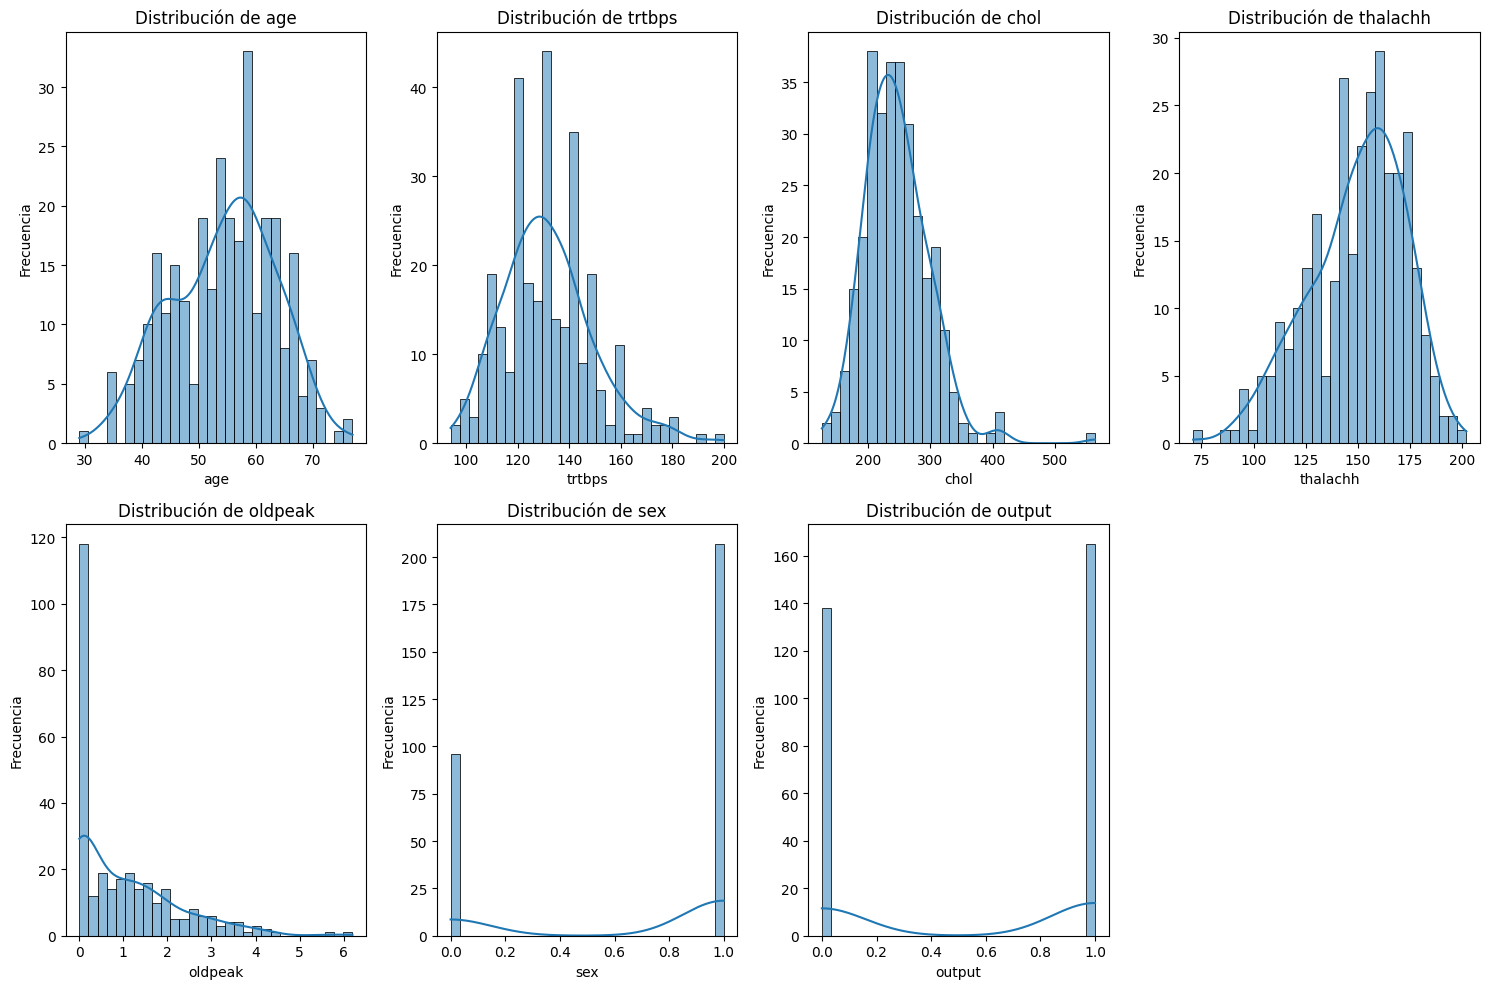

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizar las distribuciones de las características
features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'sex', 'output' ]

plt.figure(figsize=(15, 10))

# Dibujar histogramas para cada característica seleccionada
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


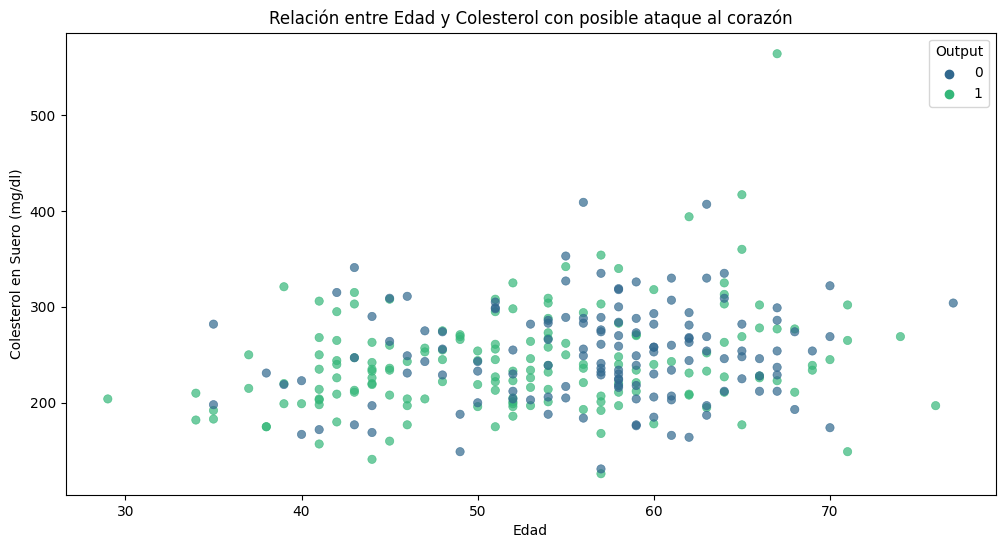

In [ ]:
# Visualizar la relación entre la edad, el colesterol y la variable objetivo
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='chol', hue='output', data=data, palette='viridis', alpha=0.7, edgecolor=None)
plt.title('Relación entre Edad y Colesterol con posible ataque al corazón')
plt.xlabel('Edad')
plt.ylabel('Colesterol en Suero (mg/dl)')
plt.legend(title='Output')
plt.show()


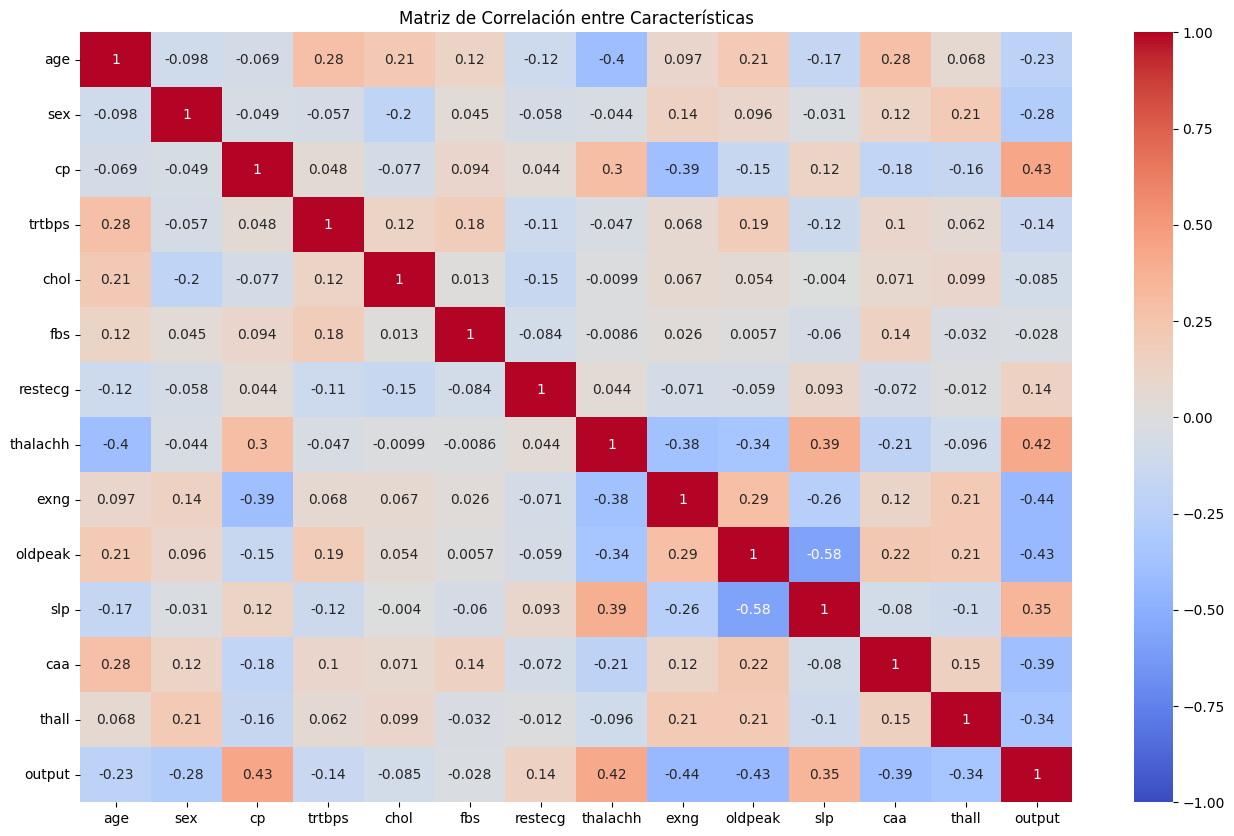

In [ ]:
# Visualizar la matriz de correlación
plt.figure(figsize=(16, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Características")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data.drop('output', axis=1)
y = data['output']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((242, 13), (61, 13))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las primeras filas de los datos estandarizados
X_train_scaled[:5]


array([[-1.35679832,  0.72250438,  0.00809909, -0.61685555,  0.91403366,
        -0.38330071,  0.8431327 ,  0.53278078, -0.67663234, -0.92086403,
         0.95390513, -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094,  1.1694912 ,  0.43952674,
        -0.38330071, -1.04610909, -1.75358236,  1.47790748, -0.19378705,
         0.95390513, -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912,  1.1694912 , -0.30070405,
        -0.38330071,  0.8431327 , -0.13967897, -0.67663234,  2.3509824 ,
        -0.69498803, -0.68970073, -0.50904773],
       [ 0.05848269, -1.38407465,  0.00809909,  0.27631782,  0.0599212 ,
        -0.38330071, -1.04610909,  0.48795013, -0.67663234,  0.35152069,
        -0.69498803, -0.68970073, -0.50904773],
       [ 0.60282153,  0.72250438, -0.97189094, -0.79549023, -0.31968433,
         2.60891771,  0.8431327 ,  0.44311948,  1.47790748,  0.35152069,
         0.95390513,  1.33342142,  1.17848036]])

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

AUC: 0.88



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


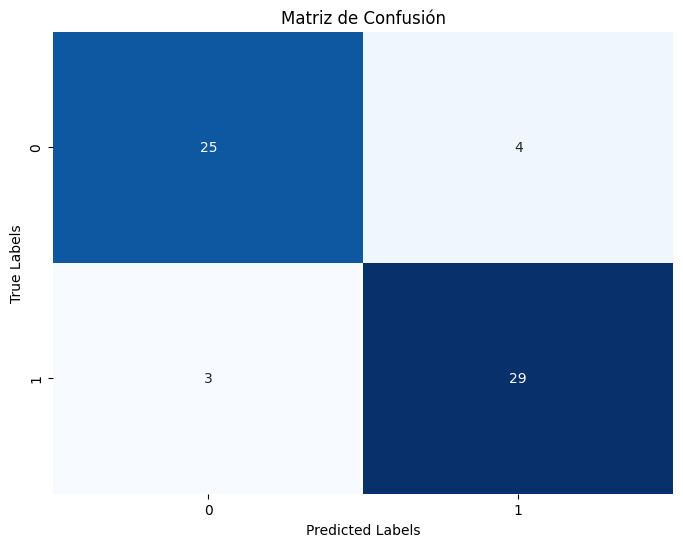

['/content/drive/MyDrive/HeartAttack/logistic_model.joblib']

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # Agregar classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Crear una instancia del modelo
model1 = LogisticRegression()

# Entrenar el modelo en los datos de entrenamiento
model1.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predictions1 = model1.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1)
recall = recall_score(y_test, predictions1)
f1 = f1_score(y_test, predictions1)

# Imprimir métricas
report = classification_report(y_test, predictions1)
print("Classification Report:\n", report)
print(f"AUC: {roc_auc_score(y_test, predictions1):.2f}\n")

conf_matrix = confusion_matrix(y_test, predictions1)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Matriz de Confusión")
plt.show()

# Guardar el modelo entrenado en un archivo
model_filename = '/content/drive/MyDrive/HeartAttack/logistic_model.joblib'
joblib.dump(model1, model_filename)


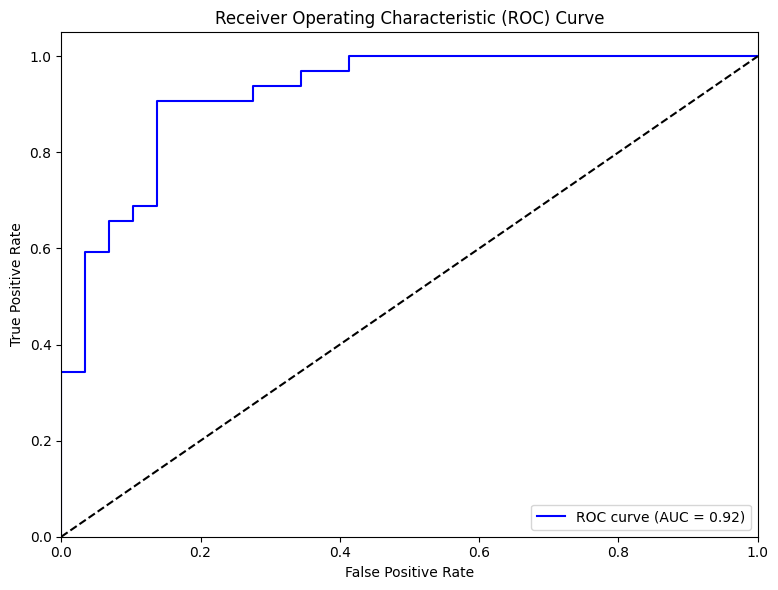

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Paso 1: Obtener las probabilidades de predicción del modelo
probs_model1 = model1.predict_proba(X_test)[:, 1]

# Paso 2: Calcular la Tasa de Verdaderos Positivos y la Tasa de Falsos Positivos para la curva ROC
fpr, tpr, _ = roc_curve(y_test, probs_model1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


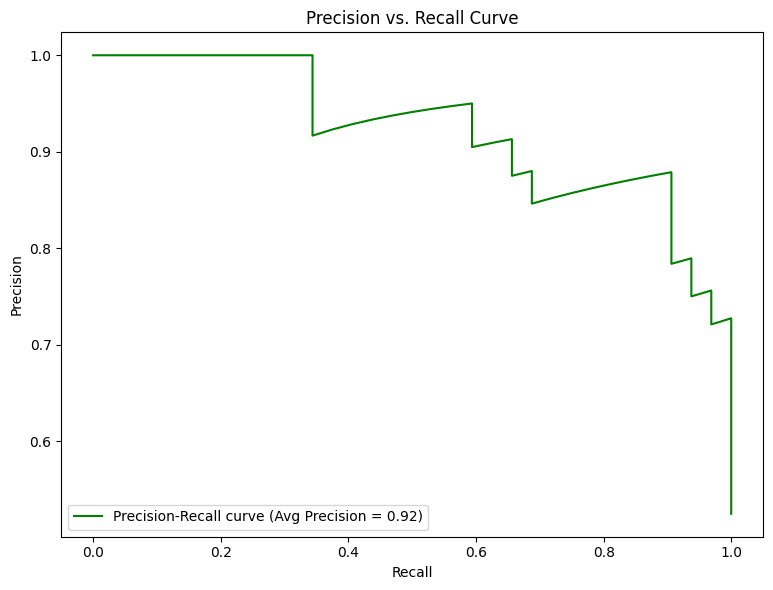

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Paso 1: Obtener las probabilidades de predicción del modelo
probs_model1 = model1.predict_proba(X_test)[:, 1]


precision_vals, recall_vals, _ = precision_recall_curve(y_test, probs_model1)
avg_precision = average_precision_score(y_test, probs_model1)

# Paso 4: Visualizar ambas curvas
plt.figure(figsize=(15, 6))

# Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall_vals, precision_vals, color='green', label=f'Precision-Recall curve (Avg Precision = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


Métricas para SVM:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

AUC: 0.87



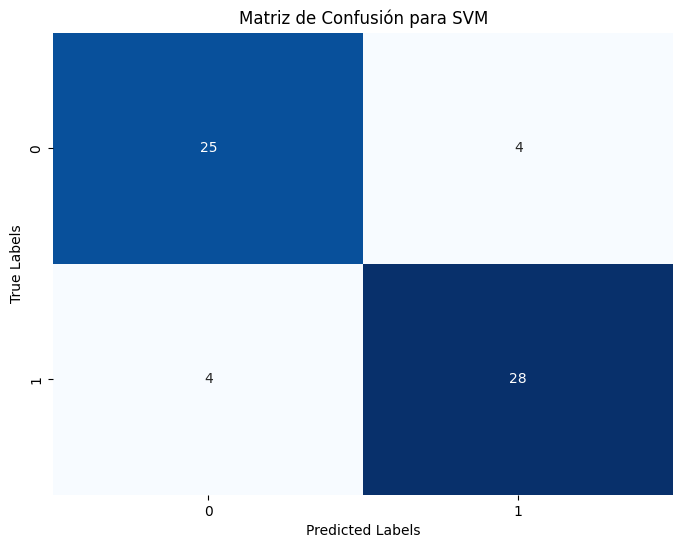

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


# Crear y entrenar el modelo SVM
model2 = SVC(kernel='linear', random_state=42)
model2.fit(X_train_scaled, y_train)

# Evaluar el modelo SVM
def evaluate_model(model, X_test_scaled, y_test, model_name):
    predictions2 = model.predict(X_test_scaled)

    # Métricas
    print(f"Métricas para {model_name}:\n")
    print(classification_report(y_test, predictions2))
    print(f"AUC: {roc_auc_score(y_test, predictions2):.2f}\n")

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, predictions2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Matriz de Confusión para {model_name}")
    plt.show()

evaluate_model(model2, X_test_scaled, y_test, "SVM")


Métricas para Árbol de Decisión:

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

AUC: 0.76



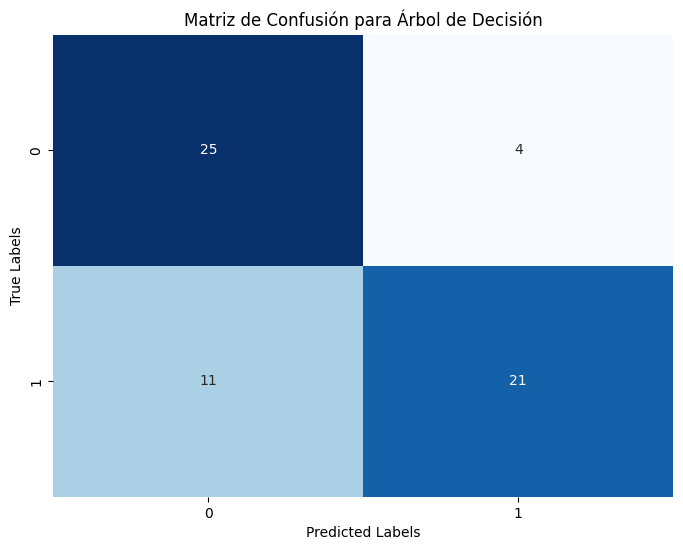

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Crear y entrenar el modelo Árbol de Decisión
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train_scaled, y_train)

# Evaluar el modelo Árbol de Decisión
def evaluate_model(model, X_test_scaled, y_test, model_name):
    predictions3 = model.predict(X_test_scaled)

    # Métricas
    print(f"Métricas para {model_name}:\n")
    print(classification_report(y_test, predictions3))
    print(f"AUC: {roc_auc_score(y_test, predictions3):.2f}\n")

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, predictions3)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Matriz de Confusión para {model_name}")
    plt.show()

evaluate_model(model3, X_test_scaled, y_test, "Árbol de Decisión")

Métricas para RandomForest:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

AUC: 0.84



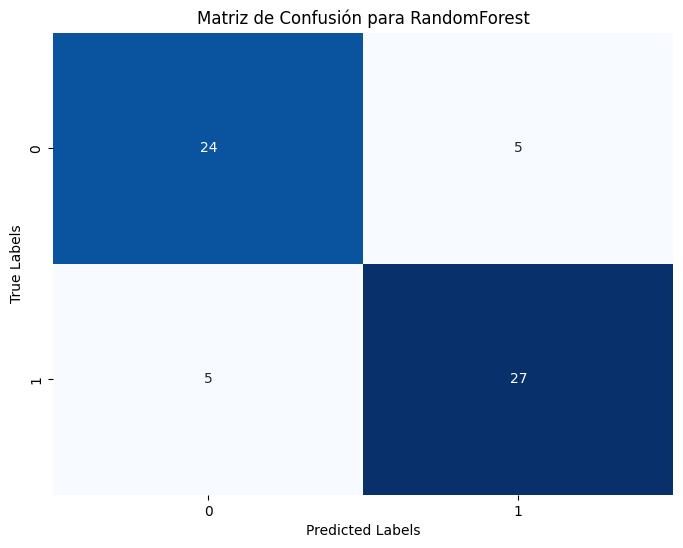

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Crear y entrenar el modelo de Bosques Aleatorios
model4 = RandomForestClassifier(random_state=42)
model4.fit(X_train_scaled, y_train)

# Evaluar el modelo de Bosques Aleatorios
def evaluate_model(model, X_test_scaled, y_test, model_name):
    predictions4 = model.predict(X_test_scaled)

    # Métricas
    print(f"Métricas para {model_name}:\n")
    print(classification_report(y_test, predictions4))
    print(f"AUC: {roc_auc_score(y_test, predictions4):.2f}\n")

    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, predictions4)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Matriz de Confusión para {model_name}")
    plt.show()

evaluate_model(model4, X_test_scaled, y_test, "RandomForest")


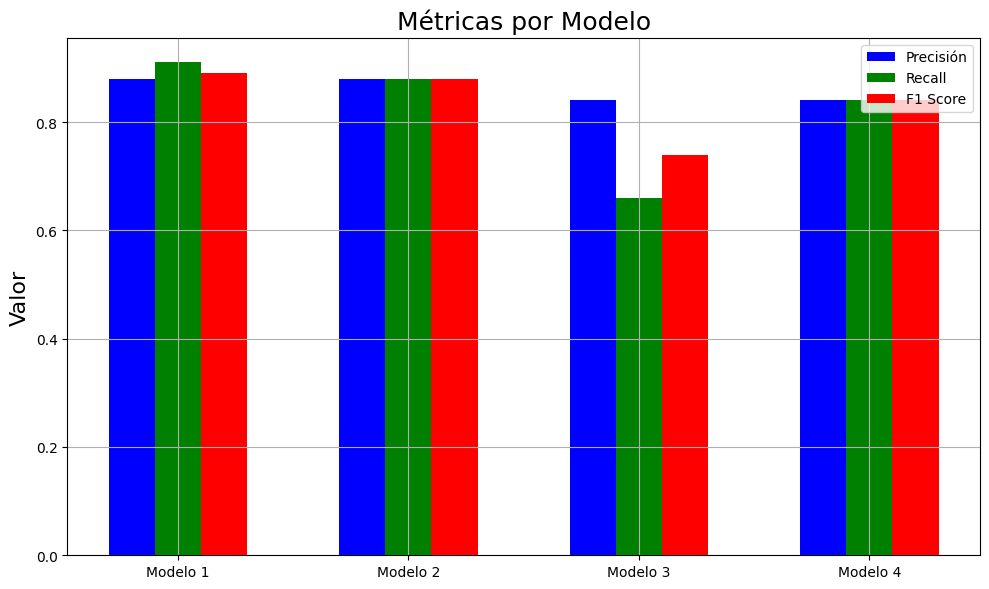

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes una lista llamada `results` que contiene los resultados de los cuatro modelos
# Cada elemento de la lista es un diccionario que contiene las métricas para un modelo específico
# Por ejemplo:
results = [
    {"model": "Modelo 1", "precision": 0.88, "recall": 0.91, "f1_score": 0.89},
    {"model": "Modelo 2", "precision": 0.88, "recall": 0.88, "f1_score": 0.88},
    {"model": "Modelo 3", "precision": 0.84, "recall": 0.66, "f1_score": 0.74},
    {"model": "Modelo 4", "precision": 0.84, "recall": 0.84, "f1_score": 0.84},  # Nuevo modelo agregado
]

# Extraer las métricas y los nombres de los modelos para la gráfica
models = [result["model"] for result in results]
precision = [result["precision"] for result in results]
recall = [result["recall"] for result in results]
f1_score = [result["f1_score"] for result in results]

# Configurar el ancho de las barras para las métricas
bar_width = 0.2

# Crear el rango de posiciones de las barras para cada modelo
x = np.arange(len(models))

# Trazar las métricas en el mismo gráfico con barras agrupadas
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, precision, width=bar_width, label="Precisión", color="b")
plt.bar(x, recall, width=bar_width, label="Recall", color="g")
plt.bar(x + bar_width, f1_score, width=bar_width, label="F1 Score", color="r")

# Etiquetar cada barra con el nombre del modelo
plt.xticks(x, models)

# Etiquetas del eje y y título
plt.ylabel("Valor", fontsize=16)
plt.title("Métricas por Modelo", fontsize=18)

# Mostrar la leyenda
plt.legend(loc="upper right")

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.9 MB/s eta 0:

In [ ]:
!pip install pyngrok qrcode[pil]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 6.1 MB/s eta 0:00:00
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=c766e7bf209c92e21b2047aea1719927d15bcaa044aade046f724df01e670b6b
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
import gradio as gr
import joblib

# Cargar el modelo
model1 = joblib.load('/content/drive/MyDrive/HeartAttack/logistic_model.joblib')


In [ ]:
import gradio as gr
import joblib
import numpy as np

# Cargar el modelo previamente entrenado
model1 = joblib.load('/content/drive/MyDrive/HeartAttack/logistic_model.joblib')

# Función para realizar predicciones
def predict_heart_attack(age, sex, cp, trtbps, chol, fbs, rest_ecg, thalach, exang, ca, thal):
    data = np.array([[
        age, sex, cp, trtbps, chol, fbs, rest_ecg, thalach, exang, ca, thal
    ]])
    pred_proba = model1.predict_proba(data)
    pred = model1.predict(data)
    chance_of_attack = pred_proba[0][1] * 100
    if pred[0] == 1:
        return f"Posibilidad de ataque al corazón: {chance_of_attack:.2f}%. Se sugiere una consulta médica."
    else:
        return f"Posibilidad de ataque al corazón: {chance_of_attack:.2f}%. Parece estar en un rango normal."

# Crear la interfaz con Gradio con la opción "live" desactivada
interface = gr.Interface(fn=predict_heart_attack,
                         inputs=[
                             gr.inputs.Number(label="Edad"),
                             gr.inputs.Radio(choices=["1 Hombre", "0 Mujer"], label="Sexo"),
                             gr.inputs.Dropdown(choices=[
                                 "1 Angina Tipica (Dolor de pecho común)",
                                 "2 Angina Atipica (Dolor de pecho extraño)",
                                 "3 No dolor de Angina (Dolor no relacionado al corazón)",
                                 "4 Asintomático (Sin dolor ni molestias)"
                             ], label="Tipo de dolor en el pecho"),
                             gr.inputs.Slider(minimum=90, maximum=200, default=130, label="Presión arterial en reposo"),
                             gr.inputs.Slider(minimum=100, maximum=400, default=250, label="Colesterol sérico"),
                             gr.inputs.Radio(choices=["Si", "No"], label="Diabetes"),
                             gr.inputs.Dropdown(choices=[
                                 "Normal",
                                 "Anomalía de la onda ST",
                                 "hipertrofia ventricular izquierda probable o definitiva"
                             ], label="Resultado del electrocardiograma en reposo"),
                             gr.inputs.Slider(minimum=60, maximum=200, default=150, label="Máxima frecuencia cardíaca alcanzada"),
                             gr.inputs.Radio(choices=["Si", "No"], label="Angina inducida por ejercicio"),
                             gr.inputs.Radio(choices={
                                 0: "No hay vasos principales (arterias coronarias) con obstrucciones significativas.",
                                 1: "Un vaso principal tiene una obstrucción significativa.",
                                 2: "Dos vasos principales tienen obstrucciones significativas.",
                                 3: "Tres vasos principales tienen obstrucciones significativas."
                             }, label="Número de vasos principales coloreados por fluoroscopia"),
                             gr.inputs.Radio(choices=["Bajo", "Medio", "Alto"], label="Thalassemia")
                         ],
                         outputs="text",
                         live=False)

interface.launch(share=False)  # Set share to False for running on Google Colab


<ipython-input-23-0750df96a2ad>:24: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="Edad"),
<ipython-input-23-0750df96a2ad>:24: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Number(label="Edad"),
<ipython-input-23-0750df96a2ad>:25: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Radio(choices=["1 Hombre", "0 Mujer"], label="Sexo"),
<ipython-input-23-0750df96a2ad>:25: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Radio(choices=["1 Hombre", "0 Mujer"], label="Sexo"),
<ipython-input-23-0750df96a2ad>:26: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from g

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>